# 파일 다운로드

In [2]:
import sys
from pandas import read_csv, pivot_table, melt
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
plt.rcParams['font.family'] = 'AppleGothic' if sys.platform == 'darwin' else 'Malgun Gothic'
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.unicode_minus'] = False

In [40]:
# origin1 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/시간대별 카드 이용금액 현황_제주데이터랩(180101-231031).csv')
# origin2 = read_csv('C:/Users/kimjh/산대특_데이터분석 알고리즘 개발/megaIT_da/2차 프로젝트/업종별성별외식업이용정보_제주데이터랩(180101-231031).csv')
origin1 = read_csv('../../파일/종현/업종별성별카드이용정보_제주데이터랩(180101-231031).csv', encoding='euc-kr')

In [41]:
origin1.head()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
0,201801,건강보조식품 소매업,기타외국,알수없음,65,78,101523250
1,201801,건강보조식품 소매업,내국인,남성,159,165,25558470
2,201801,건강보조식품 소매업,내국인,알수없음,1,1,396000
3,201801,건강보조식품 소매업,내국인,여성,200,218,32041740
4,201801,건강보조식품 소매업,동남아,알수없음,8,8,1550000


In [42]:
origin1.tail()

,연월,업종명,이용자구분,성별,이용자수,이용건수,이용금액
20639,202310,휴양콘도 운영업,법인,알수없음,2084,4413,2208853529
20640,202310,휴양콘도 운영업,제주도민,남성,897,1118,64997332
20641,202310,휴양콘도 운영업,제주도민,알수없음,1,1,4000
20642,202310,휴양콘도 운영업,제주도민,여성,967,1169,86172869
20643,202310,휴양콘도 운영업,중국,알수없음,63,76,6297800


In [43]:
origin1['이용자구분'].value_counts()

이용자구분
내국인     6376
제주도민    5616
법인      2795
중국      1878
기타외국    1865
일본      1113
동남아     1001
Name: count, dtype: int64

In [44]:
tmp = origin1.query('이용자구분 != "제주도민"')

In [45]:
tmp['이용자구분'] = origin1['이용자구분'].astype('category')
tmp['성별'] = origin1['성별'].astype('category')
tmp['업종명'] = origin1['업종명'].astype('category')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_13684\1532828591.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['이용자구분'] = origin1['이용자구분'].astype('category')
C:\Users\kimjh\AppData\Local\Temp\ipykernel_13684\1532828591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmp['성별'] = origin1['성별'].astype('category')
C:\Users\kimjh\AppData\Local\Temp\ipykernel_13684\1532828591.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [46]:
tmp.dtypes

연월          int64
업종명      category
이용자구분    category
성별       category
이용자수        int64
이용건수        int64
이용금액        int64
dtype: object

In [47]:
pivot1 = pivot_table(tmp,
                     index=['연월', '이용자구분'],
                     columns='업종명',
                     values='이용자수',
                     aggfunc='sum')
pivot1.head()

업종명           건강보조식품 소매업  골프장 운영업  과실 및 채소 소매업  관광 민예품 및 선물용품 소매업  \
연월     이용자구분                                                        
201801 기타외국           65        2            1                  1   
       내국인           360     4627        20137              19039   
       동남아             8        0            0                 28   
       법인            189     4522         4573               1340   
       일본              1        7            0                  0   

업종명           그외 기타 분류안된 오락관련 서비스업  그외 기타 스포츠시설 운영업  그외 기타 종합 소매업  \
연월     이용자구분                                                        
201801 기타외국                      0                0             0   
       내국인                      64              430          7030   
       동남아                       0                0             0   
       법인                       15               56          5865   
       일본                        0                0             0   

업종명           기타 갬블링 및 베팅업  기타 대형 종합 소매업  기타 수상오락 서비스업  ...  중식 음식점업  \
연월     이용자구분                                            ...            
201801 기타외국              0             0             0  ...        2   
       내국인               0         30238            11  ...    10602   
       동남아               0             0             0  ...        1   
       법인                0         11660             3  ...     9579   
       일본               22             0             0  ...        1   

업종명           차량용 가스 충전업  차량용 주유소 운영업  체인화 편의점  택시 운송업  \
연월     이용자구분                                             
201801 기타외국            0            0        0       0   
       내국인          4632        67091   281760       0   
       동남아             0            0        0       0   
       법인           3374        53381    51488       0   
       일본              0            0        0       0   

업종명           피자, 햄버거, 샌드위치 및 유사 음식점업  한식 음식점업   호텔업  화장품 및 방향제 소매업  휴양콘도 운영업  
연월     이용자구분                                                                   
201801 기타외국                         5       38   362              3         0  
       내국인                      32025   269550  7361           6059     11389  
       동남아                          0       14    13             13         0  
       법인                        8646   141005  3484            868      2258  
       일본                           0       24    59              2         0  

[5 rows x 43 columns]

In [48]:
pivot1.value_counts()

건강보조식품 소매업  골프장 운영업  과실 및 채소 소매업  관광 민예품 및 선물용품 소매업  그외 기타 분류안된 오락관련 서비스업  그외 기타 스포츠시설 운영업  그외 기타 종합 소매업  기타 갬블링 및 베팅업  기타 대형 종합 소매업  기타 수상오락 서비스업  기타 외국식 음식점업  기타 주점업  기타음?식료품위주종합소매업  기타음식료품위주종합소매업  내항 여객 운송업  마사지업  면세점   버스 운송업  비알콜 음료점업  빵 및 과자류 소매업  서양식 음식점업  수산물 소매업  슈퍼마켓   스포츠 및 레크레이션 용품 임대업  여관업   여행사업  욕탕업   육류 소매업  일반유흥 주점업  일식 음식점업  자동차 임대업  전시 및 행사 대행업  정기 항공 운송업  중식 음식점업  차량용 가스 충전업  차량용 주유소 운영업  체인화 편의점  택시 운송업  피자, 햄버거, 샌드위치 및 유사 음식점업  한식 음식점업  호텔업   화장품 및 방향제 소매업  휴양콘도 운영업
0           0        0            0                  0                     0                0             0             0             0             0            0       0               0              0          0     0     0       0         0            0         0        0      0                   0     0     0     0       0         0        0        0            0          0        0           0            0        0       0                        0        0     0              0           78
175     

In [ ]:
증감률이랑 막대그래프로

In [49]:
pivot1['휴양콘도 운영업']

연월      이용자구분
201801  기타외국         0
        내국인      11389
        동남아          0
        법인        2258
        일본           0
                 ...  
202310  동남아          0
        법인        2084
        일본           0
        제주도민         0
        중국          63
Name: 휴양콘도 운영업, Length: 490, dtype: int64

In [50]:
tmp2=pivot1[['호텔업', '여관업', '휴양콘도 운영업']]

In [51]:
tmp2

업종명            호텔업    여관업  휴양콘도 운영업
연월     이용자구분                       
201801 기타외국    362     11         0
       내국인    7361  23743     11389
       동남아      13      5         0
       법인     3484   8451      2258
       일본       59      4         0
...            ...    ...       ...
202310 동남아    2032    262         0
       법인     3369   8224      2084
       일본       53     11         0
       제주도민      0      0         0
       중국      342    228        63

[490 rows x 3 columns]

In [60]:
tmp2.reset_index()

AttributeError: 'function' object has no attribute 'reset_index'

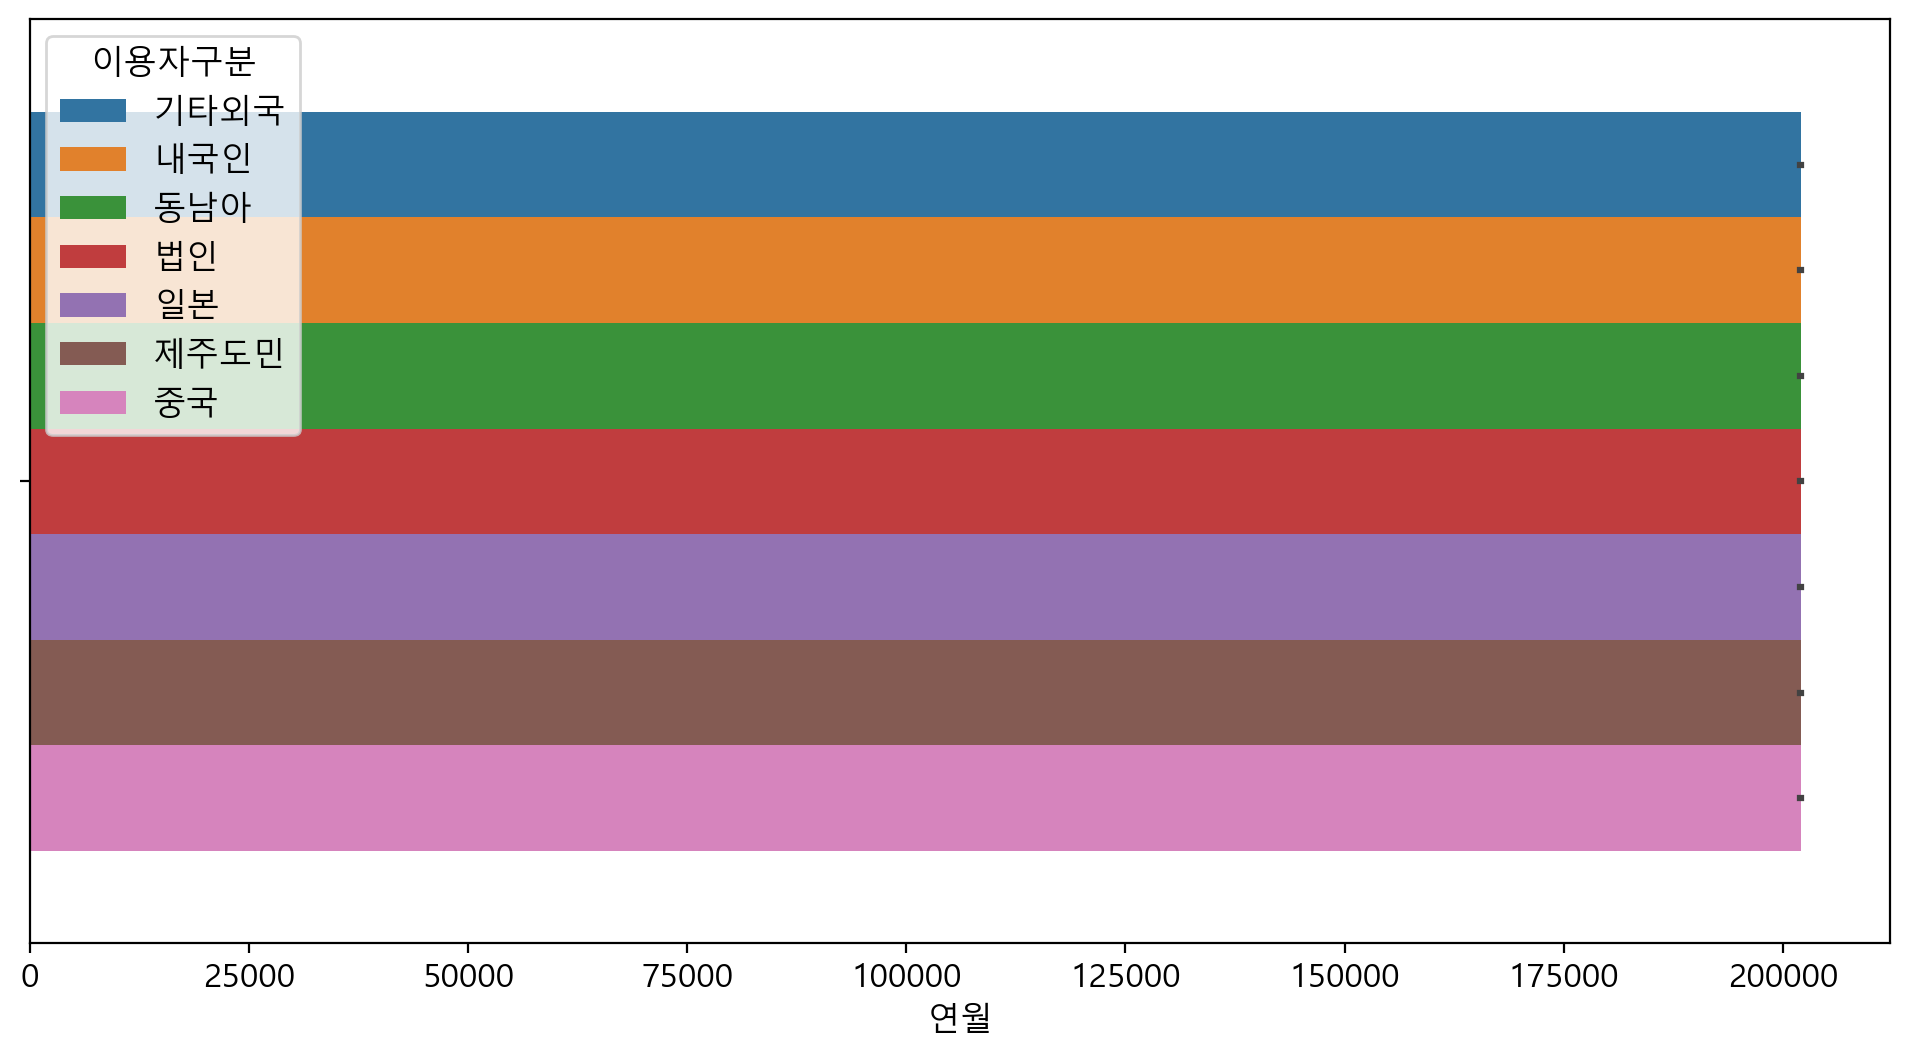

In [53]:
# 1. 숙박 및 음식점업(55-56)
# (1) 숙박업
# '호텔업', '여관업', '휴양콘도 운영업',



plt.figure()
sns.barplot(data=tmp2, x='연월', hue='이용자구분')
plt.show()
plt.close()

In [ ]:
1. 숙박 및 음식점업(55-56)
(2) 음식점업
'서양식 음식점업', 
'일식 음식점업', 
'피자, 햄버거, 샌드위치 및 유사 음식점업',
'기타 외국식 음식점업',
'한식 음식점업',
'중식 음식점업',

(3) 주점업
'비알콜 음료점업', 
'일반유흥 주점업',
'기타 주점업', 



In [ ]:
2. 예술, 스포츠 및 여가관련 서비스업
(1) 스포츠 및 오락관련 서비스업
'그외 기타 분류안된 오락관련 서비스업',
'기타 수상오락 서비스업', 
'그외 기타 스포츠시설 운영업', 
'골프장 운영업', 

(2) 유원지 및 기타 오락관련 서비스업
'기타 갬블링 및 베팅업',


2. 임대업(부동산 제외)
(1) 개인 및 가정용품 임대업
'스포츠 및 레크레이션 용품 임대업',


In [ ]:
(2) 운송장비 임대업
'자동차 임대업', 
 


In [ ]:
# 패키지?? 문화생활?? 전시관 드읃으

3. 사업 지원 서비스업
(1) 사업 지원 서비스업
'여행사업',
'전시 및 행사 대행업', 


In [ ]:

3. 소매업(47-)
(1) 대형 종합 소매업(대형마트)
'기타 대형 종합 소매업',

(2) 음식료품 위주 종합 소매업
'슈퍼마켓', 
'체인화 편의점',
'기타음식료품위주종합소매업',

(4) 그외 기타 종합 소매업
'그외 기타 종합 소매업',


In [ ]:
# 기념품????

3. 소매업(47-)
(3) 면세점
'면세점',


(6) 기타 상품 소매업
'화장품 및 방향제 소매업',
'관광 민예품 및 선물용품 소매업', 

In [ ]:
# 제주도에서 소비하는 식대. 고기 굽고~
3. 소매업(47-)
(5) 음,식료품 및 담배 소매업
'육류 소매업',
'건강 보조식품 소매업', 
'빵 및 과자류 소매업', 
'과실 및 채소 소매업',
'수산물 소매업', 


In [ ]:
# 관광지내 이동

(7) 연료 소매업
'차량용 주유소 운영업',
'차량용 가스 충전업',





In [ ]:
# 제주도로 이동 혹은 제주도서 내 이동

4. 운송업
'택시 운송업'
'내항 여객 운송업'(배)
'정기 항공 운송업'(비행기), 

In [ ]:
5. 기타 개인 서비스 업
(1) 개인 서비스 업
'욕탕업', 
'마사지업', 

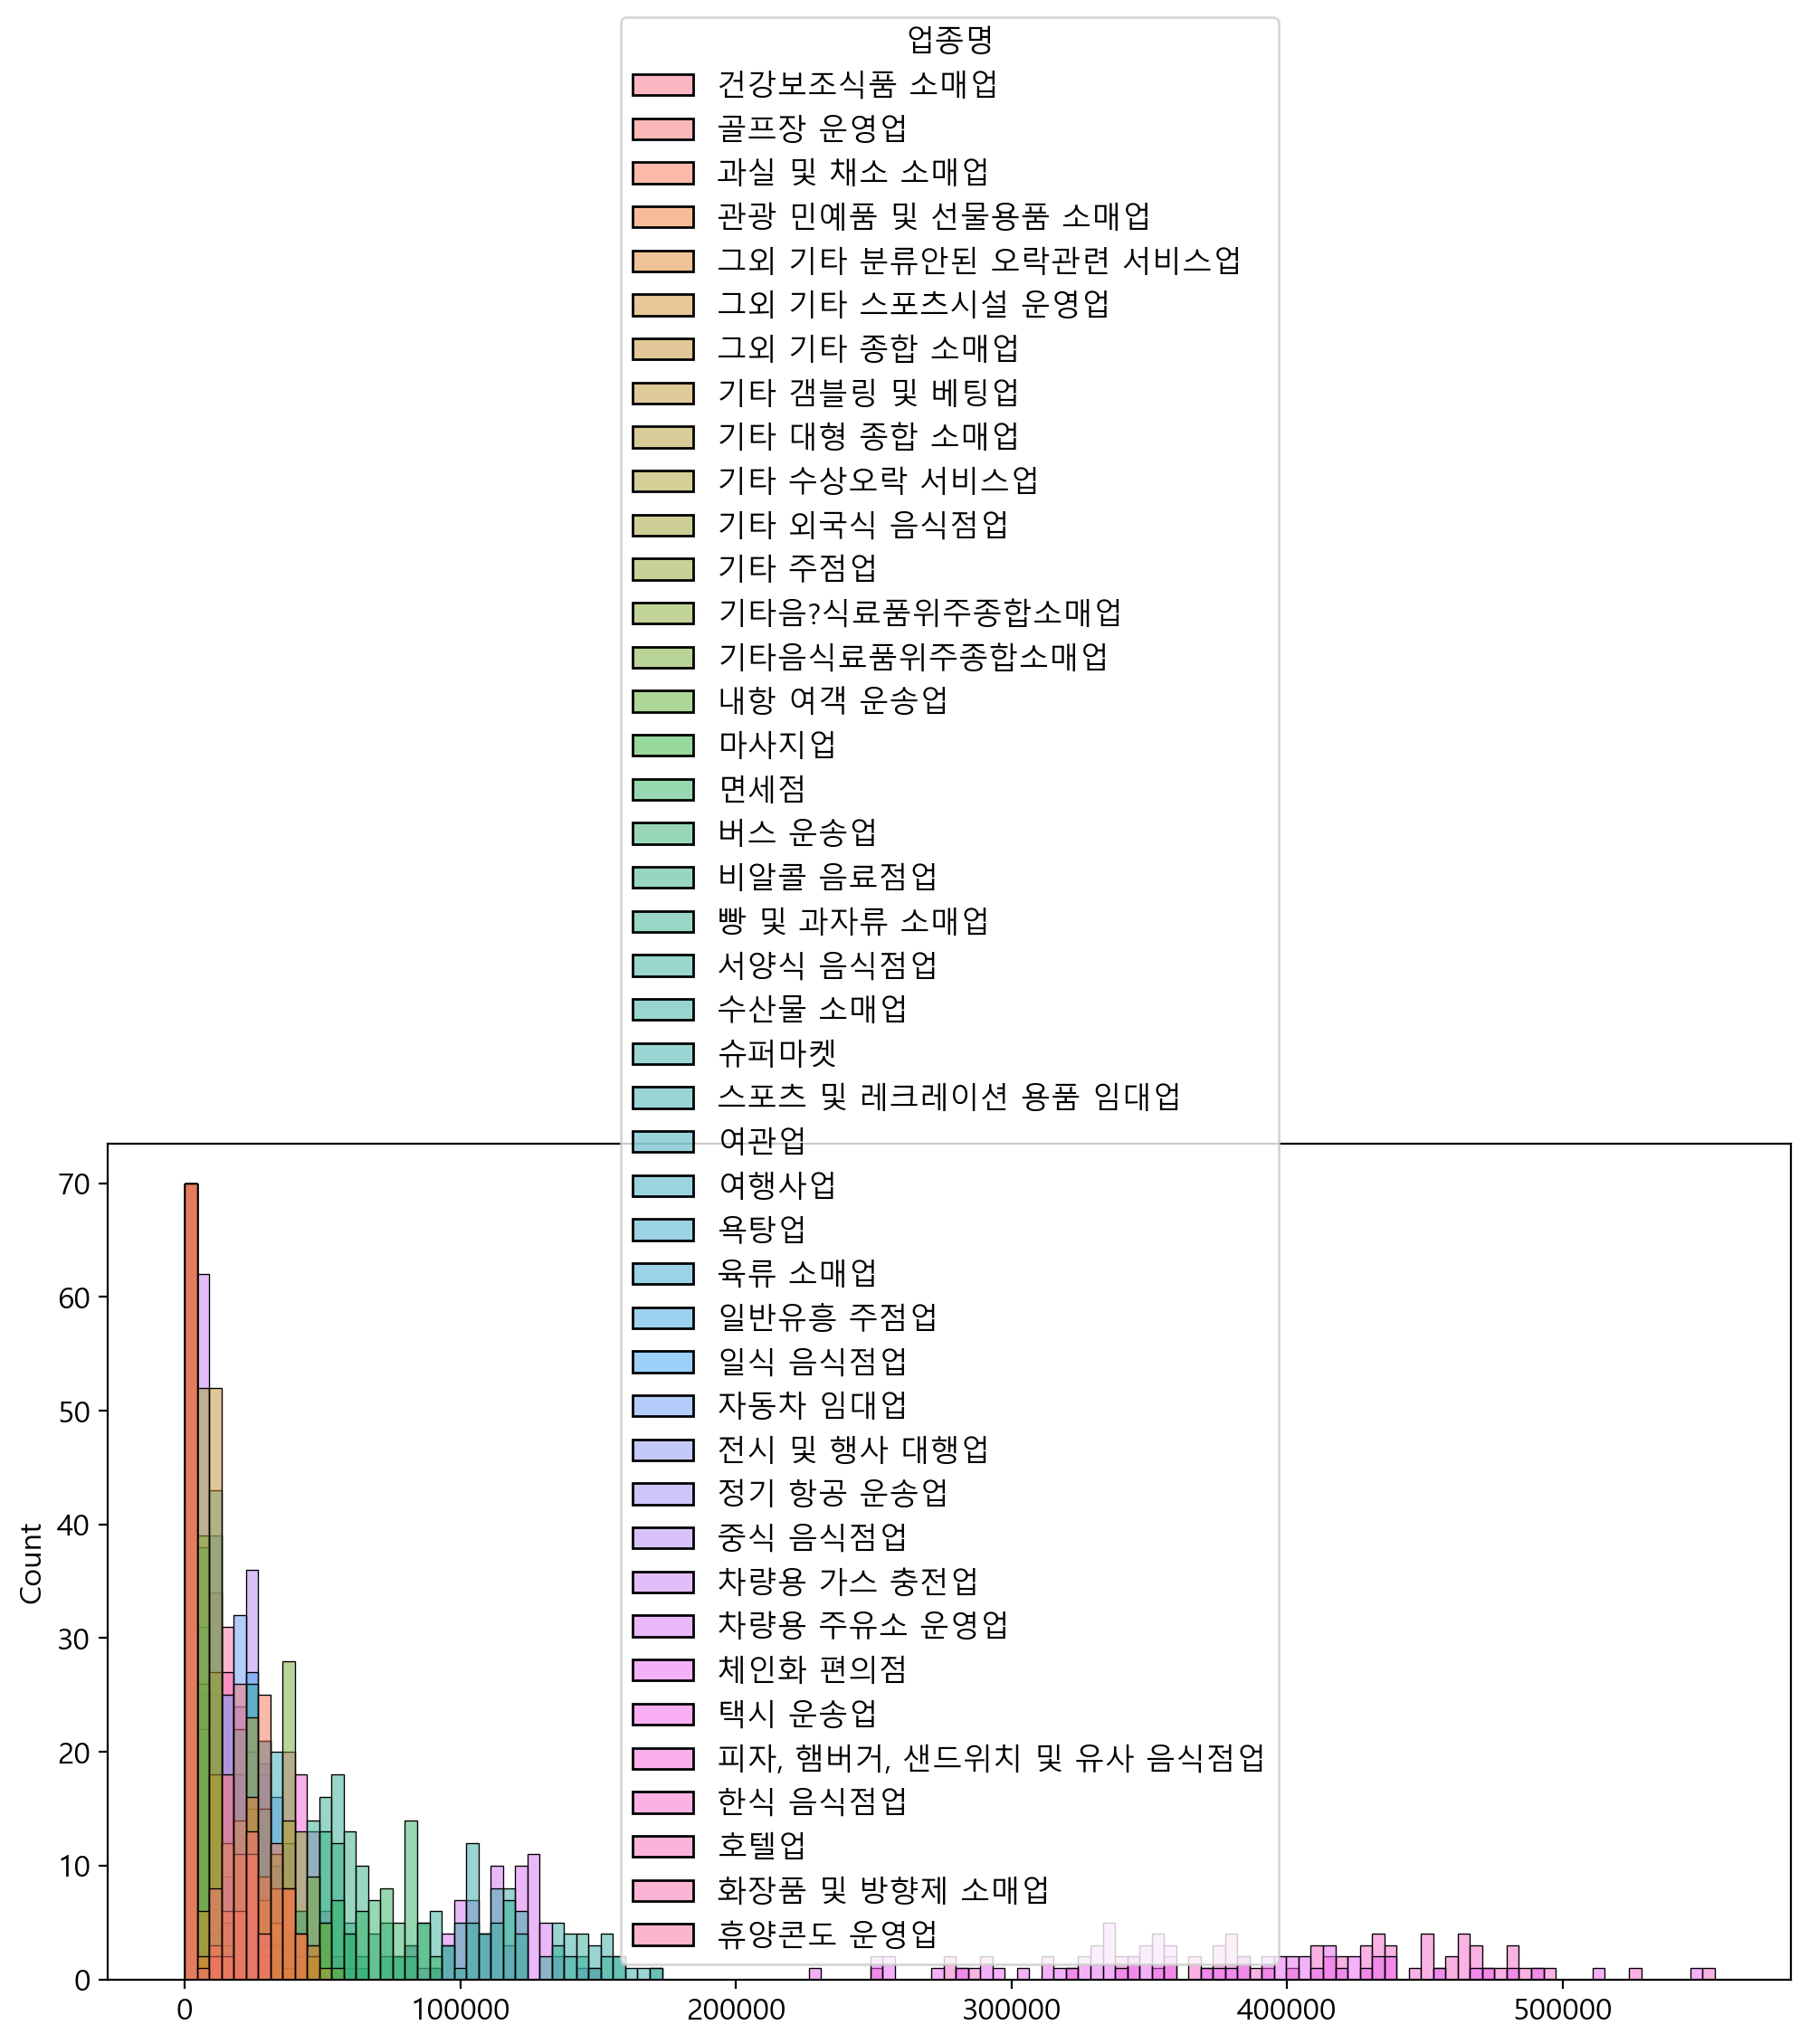

In [15]:
plt.figure()
sns.histplot(data=pivot1)
plt.show()
plt.close()